# Getting Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_train = pd.read_csv(r'C:\Users\DELL\Downloads\Loan_Eligibility\loan-train.csv')
loan_test = pd.read_csv(r'C:\Users\DELL\Downloads\Loan_Eligibility\loan-test.csv')

In [3]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As we can see in the output.

There are 614 entries
There are total 13 features (0 to 12)
There are three types of datatype dtypes: float64(4), int64(1), object(8)
It's Memory usage that is, memory usage: 62.5+ KB
Also, We can check how many missing values available in the Non-Null Count column

# Exploratory Data Analysis

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt     
from scipy import stats

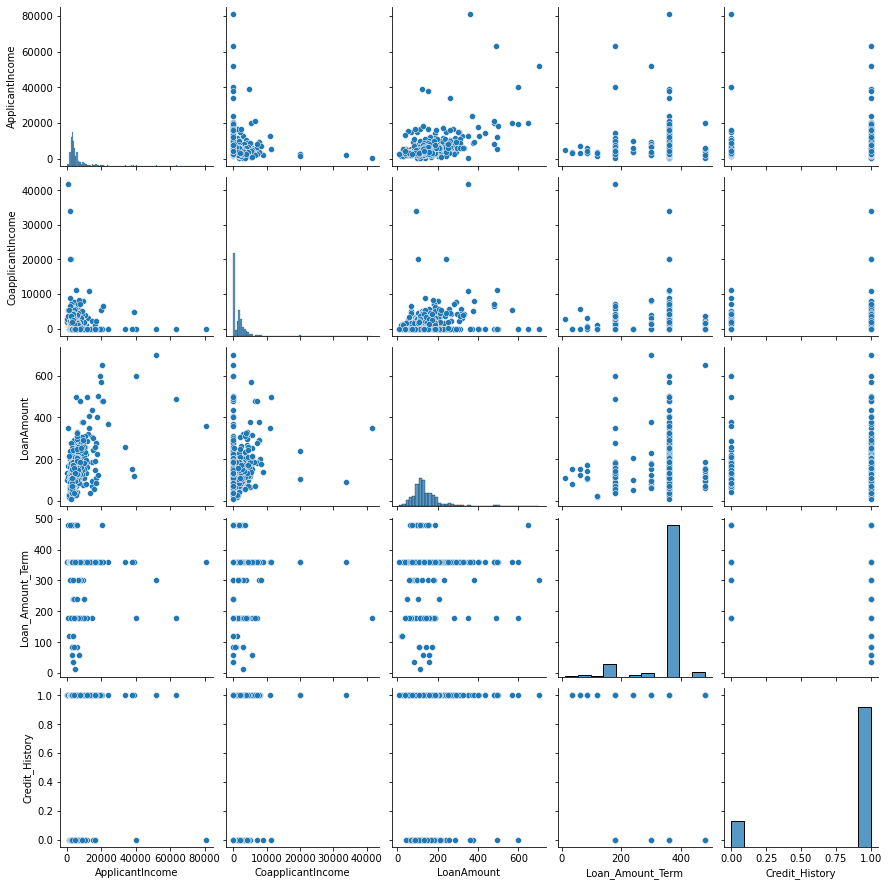

In [7]:
sns.pairplot(loan_train)

Pairplot gives us a general feel of how the datas are related to each other.

<AxesSubplot:>

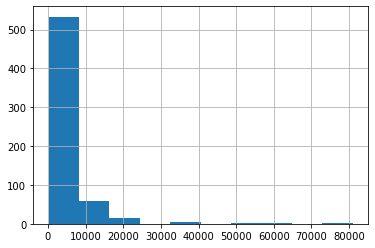

In [8]:
loan_train['ApplicantIncome'].hist()

<AxesSubplot:>

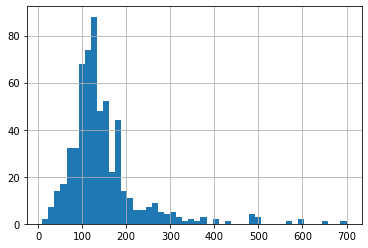

In [11]:
loan_train['LoanAmount'].hist(bins=50)

EDA for categorical variable

In [12]:
loan_approval = loan_train['Loan_Status'].value_counts()['Y']
print("Total number of loans approved: ", loan_approval)

Total number of loans approved:  422


In [14]:
# Credit History and Loan Status
pd.crosstab(loan_train ['Credit_History'], loan_train ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

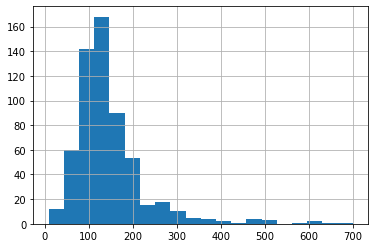

In [15]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
loan_train['TotalIncome'] = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
loan_train['LoanAmount'].hist(bins=20)

<AxesSubplot:>

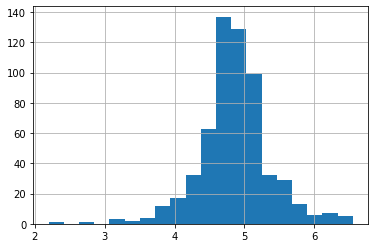

In [16]:
# Perform log transformation of TotalIncome to make it closer to normal
loan_train['LoanAmount_log'] = np.log(loan_train['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
loan_train['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

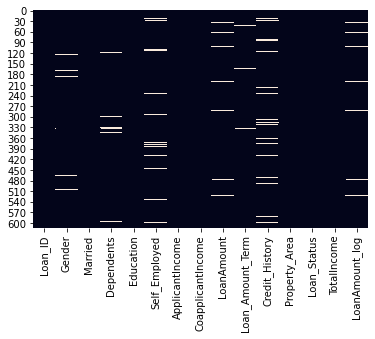

In [17]:
#Visualizing the null values; the white bars represent the null values of each column
sns.heatmap(loan_train.isnull(), cbar=False)

As we can see here, there are too many columns missing with small amount of null values so we use mean amd mode to replace with NaN values.

In [18]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean(), inplace=True) # Mean
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mean(), inplace=True) # Mean

Convert Categorical variable with Numerical values.

In [19]:
loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [20]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)

In [21]:
#Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package

from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

In [31]:
loan_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.093191,0.145548
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.083319,0.183005
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.125590,0.159614
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.161362,-0.149400
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,0.113000,0.111737
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,0.893037,0.439463
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,0.342781,0.207122
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,0.620102,0.896371
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.069830,0.088396
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,-0.014447,-0.024995


<AxesSubplot:>

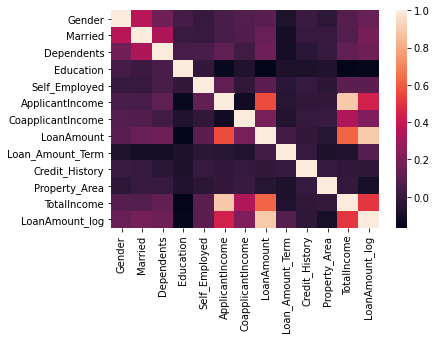

In [32]:
sns.heatmap(loan_train.corr(), annot=False)

# ML Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [34]:
train_features = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values

In [35]:
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
from sklearn.svm import SVC
SVModel = SVC(kernel='sigmoid', C=1, gamma='auto')

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
models= (SVModel, logistic_model)

In [39]:
print("Accuracy score for SVM, logistic_model respectively")
for i in models:
    i.fit(x_train, y_train)
    print(accuracy_score(y_train, i.predict(x_train)))

print("Confusion matrix for SVM, logistic_model respectively")
for i in models:
    i.fit(x_train, y_train)
    print(confusion_matrix(y_train, i.predict(x_train)))

Accuracy score for SVM, logistic_model respectively
0.6872964169381107
0.8127035830618893
Confusion matrix for SVM, logistic_model respectively
[[  0 192]
 [  0 422]]
[[ 85 107]
 [  8 414]]


Hyperparameter tuning using GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#Hyperparameter for logistic_model
pramas_logModel ={'C':[0.1, 1, 10, 100, 1000], 'penalty':['l1', 'l2']}
grid_search = GridSearchCV(logistic_model, pramas_logModel, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters for logistic_model: ", grid_search.best_params_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_valida

Best parameters for logistic_model:  {'C': 10, 'penalty': 'l2'}


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.80294549        nan 0.80619752        nan 0.80621085
        nan 0.80293216        nan 0.8045715 ]
  warnings.warn(


In [42]:
print(confusion_matrix(y_train, logistic_model.predict(x_train)))

[[ 85 107]
 [  8 414]]


In [43]:
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000, C=10, penalty= 'l2')

In [44]:
logistic_model.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [45]:
print(accuracy_score(y_train, logistic_model.predict(x_train)))

0.8127035830618893
